In [20]:
# pyscience imports
import os
import sys
import glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background")
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [31]:
%pwd
years = list(range(1951, 1995, 1))
colorder = ['year', 'club', 'played', 'home_w', 'home_d', 'home_l', 'home_f', 'home_a', 
'away_w', 'away_d', 'away_l', 'away_f', 'away_a', 'pts' , 'n_teams']
epl_renames = {
    'Team': 'club',
    'Played': 'played',
    'Pts': 'pts'
}

'/mnt/d/Dropbox/Dropbox/1_Research/league-tables-scraper'

In [32]:
english_league = []
scottish_league = []
for s in years:
    # english league
    try:
        r = pd.read_csv('english_league_tables/english_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r.rename(columns = epl_renames, inplace=True)
        r = r[colorder]
        english_league.append(r)
    except:
        print('English League ' + str(s) + ' league table not found')
    # scottish league
    try:
        r = pd.read_csv('scottish_league_tables/scottish_league_' + str(s) + '.csv')
        r['n_teams'] = len(r)
        r = r[colorder]
        scottish_league.append(r)
    except:
        print('Scottish League ' + str(s) + ' league table not found')

In [33]:
spl_series = pd.concat(scottish_league)
spl_series = spl_series[[c for c in spl_series.columns if not c.startswith('Unnamed')]]
spl_series['pos'] = spl_series.index + 1
spl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos
0,1951,Hibernian,30.0,13,1,1.0,44.0,9.0,9.0,3.0,3.0,34.0,17.0,48.0,16,1
1,1951,Rangers,30.0,10,3,2.0,36.0,13.0,7.0,1.0,7.0,28.0,24.0,38.0,16,2
2,1951,Dundee,30.0,11,3,1.0,32.0,12.0,4.0,5.0,6.0,15.0,18.0,38.0,16,3
3,1951,Hearts,30.0,10,3,2.0,46.0,17.0,6.0,2.0,7.0,26.0,28.0,37.0,16,4
4,1951,Aberdeen,30.0,9,2,4.0,35.0,21.0,6.0,3.0,6.0,26.0,29.0,35.0,16,5


In [34]:
epl_series = pd.concat(english_league)
epl_series = epl_series[[c for c in epl_series.columns if not c.startswith('Unnamed')]]
epl_series['year'] = 1900 + epl_series.year
epl_series['pos'] = epl_series.index + 1
epl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos
0,1951,TOTTENHAM HOTSPUR,42,17,2,2,54,21,8,8,5,28,23,60,22,1
1,1951,Manchester United,42,14,4,3,42,16,10,4,7,32,24,56,22,2
2,1951,Blackpool,42,12,6,3,43,19,8,4,9,36,34,50,22,3
3,1951,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,49,22,4
4,1951,Arsenal,42,11,5,5,47,28,8,4,9,26,28,47,22,5


In [35]:
spl_series['goals'] = spl_series.home_f + spl_series.away_f
epl_series['goals'] = epl_series.home_f + epl_series.away_f

In [36]:
spl_series['goals_permatch'] = spl_series.goals / spl_series.played
epl_series['goals_permatch'] = epl_series.goals / epl_series.played

In [37]:
epl_series['club'] = epl_series['club'].str.title()
spl_series['club'] = spl_series['club'].str.title()
epl_series.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos,goals,goals_permatch
0,1951,Tottenham Hotspur,42,17,2,2,54,21,8,8,5,28,23,60,22,1,82,1.952381
1,1951,Manchester United,42,14,4,3,42,16,10,4,7,32,24,56,22,2,74,1.761905
2,1951,Blackpool,42,12,6,3,43,19,8,4,9,36,34,50,22,3,79,1.880952
3,1951,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,49,22,4,62,1.476190
4,1951,Arsenal,42,11,5,5,47,28,8,4,9,26,28,47,22,5,73,1.738095


In [38]:
sorted(list(epl_series['club'].unique()))
sorted(list(spl_series['club'].unique()))

['Arsenal',
 'Aston Villa',
 'Birmingham City',
 'Blackburn Rovers',
 'Blackpool',
 'Bolton Wanderers',
 'Brighton & Hove Albion',
 'Bristol City',
 'Burnley',
 'Cardiff City',
 'Carlisle United',
 'Charlton Athletic',
 'Chelsea',
 'Coventry City',
 'Crystal Palace',
 'Derby County',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Ipswich Town',
 'Leeds United',
 'Leicester City',
 'Leyton Orient',
 'Liverpool',
 'Luton Town',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Millwall',
 'Newcastle United',
 'Northampton',
 'Norwich City',
 'Nottingham Forest',
 'Notts County',
 'Oldham Athletic',
 'Oxford United',
 'Portsmouth',
 'Preston North End',
 "Queen'S Park Rangers",
 'Queens Park Rangers',
 'Sheffield United',
 'Sheffield Wednesday',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Swindon Town',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wimbledon',
 'Wolverhampton Wanderers']

['Aberdeen',
 'Airdrieonians',
 'Arbroath',
 'Ayr United',
 'Celtic',
 'Clyde',
 'Clydebank',
 'Cowdenbeath',
 'Dumbarton',
 'Dundee',
 'Dundee United',
 'Dunfermline Athletic',
 'East Fife',
 'East Stirling',
 'Falkirk',
 'Hamilton Academical',
 'Heart Of Midlothian',
 'Hearts',
 'Hibernian',
 'Kilmarnock',
 'Morton',
 'Motherwell',
 'Partick Thistle',
 'Queen Of The South',
 "Queen'S Park",
 'Raith Rovers',
 'Rangers',
 'St. Johnstone',
 'St. Mirren',
 'Stirling Albion',
 'Third Lanark']

In [39]:
epl_series.to_csv('english_league_tables/_epl_panel.csv')
spl_series.to_csv('scottish_league_tables/_spl_panel.csv')

# Winners 

In [52]:
epl_series.n_teams.value_counts()
epl_series.query('n_teams == 21')


22    880
20     60
21     21
Name: n_teams, dtype: int64

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos,goals,goals_permatch
0,1988,Liverpool,40,15,5,0,49,9,11,7,2,38,15,90,21,1,87,2.175
1,1988,Manchester United,40,14,5,1,41,17,9,7,4,30,21,81,21,2,71,1.775
2,1988,Nottingham Forest,40,11,7,2,40,17,9,6,5,27,22,73,21,3,67,1.675
3,1988,Everton,40,14,4,2,34,11,5,9,6,19,16,70,21,4,53,1.325
4,1988,Queen'S Park Rangers,40,12,4,4,30,14,7,6,7,18,24,67,21,5,48,1.200
5,1988,Arsenal,40,11,4,5,35,16,7,8,5,23,23,66,21,6,58,1.450
6,1988,Wimbledon,40,8,9,3,32,20,6,6,8,26,27,57,21,7,58,1.450
7,1988,Newcastle United,40,9,6,5,32,23,5,8,7,23,30,56,21,8,55,1.375
8,1988,Luton Town,40,11,6,3,40,21,3,5,12,17,37,53,21,9,57,1.425
9,1988,Coventry City,40,6,8,6,23,25,7,6,7,23,28,53,21,10,46,1.150


In [40]:
epl_winners = epl_series.query('pos == 1')
epl_winners[['club', 'pos']].groupby('club').sum().sort_values(by='pos', ascending = False)

,pos
club,
Liverpool,13
Manchester United,7
Arsenal,4
Everton,4
Leeds United,3
Wolverhampton Wanderers,3
Derby County,2
Tottenham Hotspur,2
Aston Villa,1


In [41]:
spl_winners = spl_series.query('pos == 1')
spl_winners[['club', 'pos']].groupby('club').sum().sort_values(by='pos', ascending = False)

,pos
club,
Rangers,17
Celtic,16
Aberdeen,4
Hearts,2
Hibernian,2
Dundee,1
Dundee United,1
Kilmarnock,1


# Arsenal 

In [42]:
arsenal_ts = epl_series.query('club == "Arsenal"')
arsenal_ts.query('pos == 1')['year']

0    1953
0    1971
0    1989
0    1991
Name: year, dtype: int64

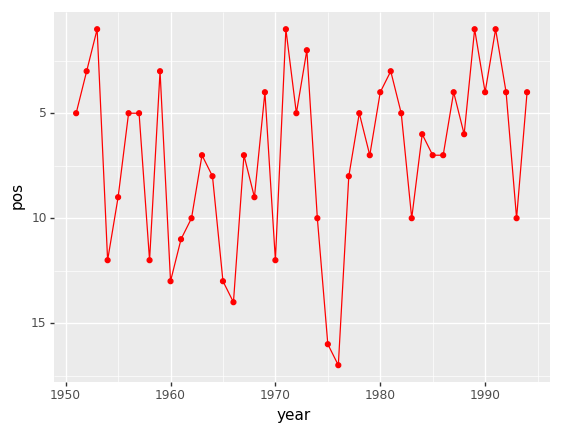

<ggplot: (-9223363259393427880)>

In [43]:
ggplot(arsenal_ts, aes(x='year', y = 'pos')) + geom_point(colour = 'red') + geom_line(colour='red') +\
    scale_y_reverse()

In [44]:
old_firm_ts = spl_series.query('club == "Celtic" | club == "Rangers"')
old_firm_ts.head()

,year,club,played,home_w,home_d,home_l,home_f,home_a,away_w,away_d,away_l,away_f,away_a,pts,n_teams,pos,goals,goals_permatch
1,1951,Rangers,30.0,10,3,2.0,36.0,13.0,7.0,1.0,7.0,28.0,24.0,38.0,16,2,64.0,2.133333
6,1951,Celtic,30.0,6,3,6.0,29.0,25.0,6.0,2.0,7.0,19.0,21.0,29.0,16,7,48.0,1.600000
1,1952,Rangers,30.0,10,4,1.0,32.0,13.0,6.0,5.0,4.0,29.0,18.0,41.0,16,2,61.0,2.033333
8,1952,Celtic,30.0,7,5,3.0,30.0,22.0,3.0,3.0,9.0,22.0,33.0,28.0,16,9,52.0,1.733333
0,1953,Rangers,30.0,12,1,2.0,49.0,14.0,6.0,6.0,3.0,31.0,25.0,43.0,16,1,80.0,2.666667


/home/alal/anaconda3/lib/python3.7/site-packages/plotnine/scales/scales.py:28: UserWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae))


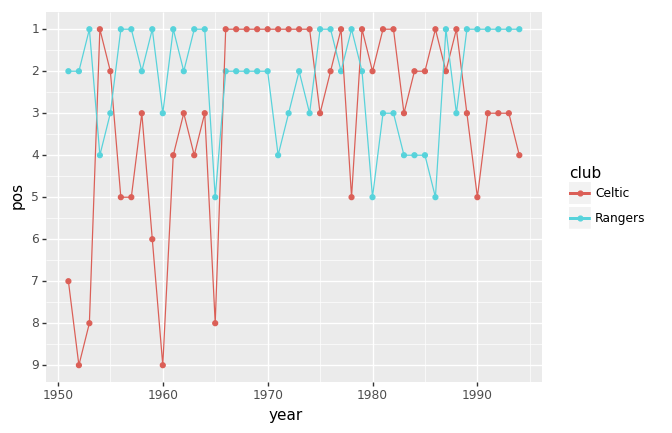

<ggplot: (8777461123725)>

In [45]:
ggplot(old_firm_ts, aes(x='year', y = 'pos', colour = 'club')) + geom_point() + geom_line() +\
    ylim(0,10) + scale_y_reverse(breaks=np.arange(1,10,1))  

In [46]:
scotlandgoals = spl_series[['year','goals_permatch']].groupby('year').mean()
englandgoals = epl_series[['year','goals_permatch']].groupby('year').mean()

# Goal Tallies 

In [47]:
scotlandgoals = spl_series[['year','goals_permatch']].groupby('year').mean()
englandgoals = epl_series[['year','goals_permatch']].groupby('year').mean()

In [48]:
ts = pd.concat([scotlandgoals, englandgoals], axis=1)
ts.columns = ['scotland_goals_per_match', 'england_goals_per_match']
ts.reset_index(inplace=True)
ts.head()

,year,scotland_goals_per_match,england_goals_per_match
0,1951,1.731250,1.529221
1,1952,1.850000,1.612554
2,1953,1.985417,1.632035
3,1954,1.885417,1.759740
4,1955,1.795833,1.701299


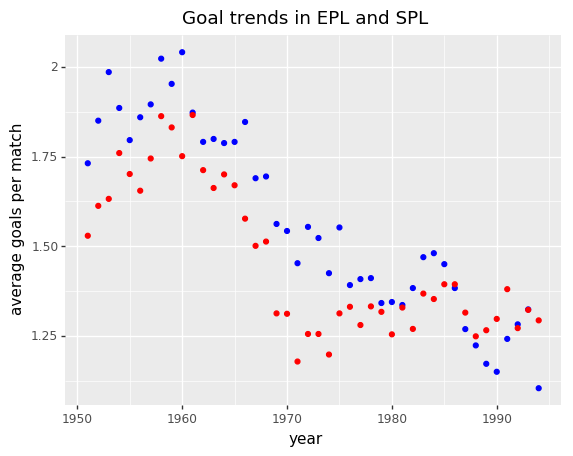

<ggplot: (-9223363259393703364)>

In [49]:
ggplot(ts, aes(x='year')) +\
    geom_point(aes(y='scotland_goals_per_match'), colour='Blue') +\
    geom_point(aes(y='england_goals_per_match'), colour='Red') +\
    labs(y = 'average goals per match', 
         title = 'Goal trends in EPL and SPL')